In [2]:
import pandas as pd
df = pd.read_csv('FIFA23_official_data.csv')

## Create a data table and visualization showing players not achieving their full potential
#### Their 'Overall' score from FIFA 2023 will be subtracted from their 'Potential' score then ranked by difference

Which players could be performing better with **better coaching**?

In [3]:
df1 = pd.DataFrame(df, columns = ["Name", "Overall", "Potential"])
#Wasn't able to show correct Difference on hover until I changed the space to an underscore in Value Difference
df1["Value_Difference"] = df1["Potential"] - df1["Overall"]
top_20 = df1.sort_values(["Value_Difference"], ascending=False).head(20)
top_20

,Name,Overall,Potential,Value_Difference
12373,D. Lobban,53,79,26
14483,22 K. Smith,57,83,26
14989,E. Mayenda,53,79,26
15169,L. Harvey,53,78,25
17450,22 C. Walsh,52,77,25
16520,22 P. Lervik,57,82,25
14675,22 A. Denholm,52,77,25
8409,22 D. Gore,57,82,25
15365,F. Valencia,50,75,25
15205,J. Feeney,55,80,25


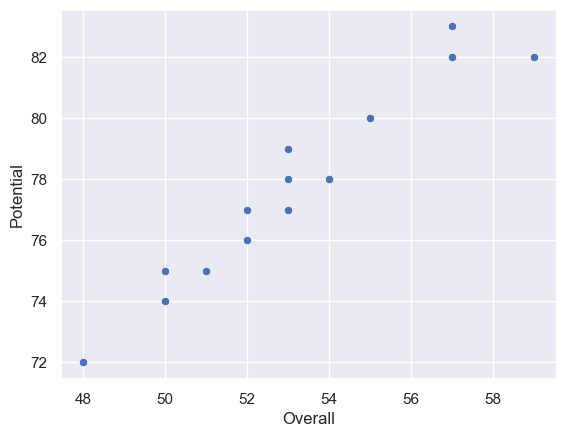

In [4]:
import seaborn as sns
sns.set()
graph = sns.scatterplot(x="Overall", y="Potential", data=top_20)

In [5]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource


TOOLTIPS = [
    ("(Overall, Potential)", "(@Overall, @Potential)"),
    ("Difference", "@Value_Difference"),
    ("Name", "@Name"),
]

p = figure(title="Underachieving Potential", plot_width = 700, tooltips = TOOLTIPS)

# change just some things about the x-axis
p.xaxis.axis_label = "Overall"
p.yaxis.major_label_text_color = "red"
p.xaxis.axis_line_width = 2

# change just some things about the y-axis
p.yaxis.axis_label = "Potential"
p.yaxis.major_label_text_color = "red"
p.xaxis.axis_line_width = 2
p.yaxis.major_label_orientation = "vertical"

#ensure points on the plot are coming from df1
p.circle('Overall', 'Potential', size=10, source= top_20)
show(p)